<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# GBA 6070 - Programming Foundation for Business Analytics
# Dr. Mohammad Salehan
# Module 8: Multidimensional Arrays

# Introduction to NumPy

This chapter, along with chapter 3, outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

For example, images–particularly digital images–can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
Sound clips can be thought of as one-dimensional arrays of intensity versus time.
Text can be converted in various ways into numerical representations, perhaps binary digits representing the frequency of certain words or pairs of words.
No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers.
(We will discuss some specific examples of this process later in [Feature Engineering](05.04-Feature-Engineering.ipynb))

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package, and the Pandas package (discussed in Chapter 3).

This chapter will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

If you followed the advice outlined in the Preface and installed the Anaconda stack, you already have NumPy installed and ready to go.
If you're more the do-it-yourself type, you can go to http://www.numpy.org/ and follow the installation instructions found there.
Once you do, you can import NumPy and double-check the version:

We start by installing NumPy library as well as a visualization library named seaborn.

In [1]:
!pip install numpy
!pip install seaborn

We proceed with the standard NumPy import, under the alias ``np``:

In [2]:
import numpy as np

## Creating Arrays from Python Lists

First, we can use ``np.array`` to create arrays from Python lists:

In [3]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [4]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [5]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

## Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.
Here are several examples:

In [6]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [9]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [10]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [11]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[4.18293298e-02, 4.57809335e-01, 8.99077916e-01],
       [4.97684600e-01, 6.31571997e-01, 8.75580767e-01],
       [1.44341687e-01, 7.57771444e-04, 3.28398278e-01]])

In [12]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 0.70287662,  1.45223916,  0.00400041],
       [-0.09083232,  0.60617728, -0.40954309],
       [-1.38289048, -0.99481593, -0.1650745 ]])

In [13]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[0, 0, 5],
       [5, 3, 2],
       [6, 9, 0]])

In [14]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types, which will be covered in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).

# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas ([Chapter 3](03.00-Introduction-to-Pandas.ipynb)) are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [16]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [17]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [18]:
x3.shape[1]

4

Another useful attribute is the ``dtype``, the data type of the array (which we discussed previously in [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)):

In [19]:
print("dtype:", x3.dtype)

dtype: int64


Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [20]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [21]:
x1

array([5, 0, 3, 3, 7, 9])

In [22]:
x1[0]

5

In [23]:
x1[4]

7

To index from the end of the array, you can use negative indices:

In [24]:
x1[-1]

9

In [25]:
x1[-2]

7

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [26]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [27]:
x2[0, 0]

3

In [28]:
x2[2, 0]

1

In [29]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [30]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [31]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

## Class exercise
Write a function that returns the last element of any 2-dimensional array. Apply it to x2.

In [32]:
x2[-1,-1]

7

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

### One-dimensional subarrays

In [33]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [35]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [36]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [37]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [38]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [39]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [40]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [41]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [42]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [43]:
x2[:3, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Finally, subarray dimensions can even be reversed together:

In [44]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [45]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [46]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [47]:
print(x2[0])  # equivalent to x2[0, :]

[12  5  2  4]


### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

In [48]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


Let's extract a $2 \times 2$ subarray from this:

In [49]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [50]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [51]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

In [52]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


If we now modify this subarray, the original array is not touched:

In [53]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [54]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [55]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. 
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [56]:
x = np.array([1, 2, 3])

print(x, x.shape)

[1 2 3] (3,)


In [57]:
# row vector via reshape
p = x.reshape((1, 3))
print(p, p.shape)

[[1 2 3]] (1, 3)


In [58]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [59]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [60]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [61]:
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [62]:
x2.T

array([[99,  7,  1],
       [ 5,  6,  6],
       [ 2,  8,  7],
       [ 4,  8,  7]])

We will see this type of transformation often throughout the remainder of the book.

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [63]:
a =[1, 2, 3]
a.extend( [3, 2, 1])
a

[1, 2, 3, 3, 2, 1]

In [64]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [65]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


It can also be used for two-dimensional arrays:

In [66]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [67]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [68]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [69]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [70]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, ``np.dstack`` will stack arrays along the third axis.

## Class exercise
Given the following arrays, merge them using concatenate, hstack, or vstack into a 2x3 array.

In [71]:
m = np.array([[1],
              [2],
              [3]],
            )
n = np.array([[4],
              [5],
              [6]],
            )

In [73]:
np.concatenate([m.T,n.T])

array([[1, 2, 3],
       [4, 5, 6]])

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [74]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice that *N* split-points, leads to *N + 1* subarrays.
The related functions ``np.hsplit`` and ``np.vsplit`` are similar:

In [75]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [76]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [77]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, ``np.dsplit`` will split arrays along the third axis.

# Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world.
Namely, it provides an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.
The key to making it fast is to use *vectorized* operations, generally implemented through NumPy's *universal functions* (ufuncs).
This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient.
It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

## The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly.
This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran.
Recently there have been various attempts to address this weakness: well-known examples are the [PyPy](http://pypy.org/) project, a just-in-time compiled implementation of Python; the [Cython](http://cython.org) project, which converts Python code to compilable C code; and the [Numba](http://numba.pydata.org/) project, which converts snippets of Python code to fast LLVM bytecode.
Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.
For example, imagine we have an array of values and we'd like to compute the reciprocal of each.
A straightforward approach might look like this:

In [78]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.arange(1, 6)
compute_reciprocals(values)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])

This implementation probably feels fairly natural to someone from, say, a C or Java background.
But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so!
We'll benchmark this with IPython's ``%timeit`` magic (discussed in [Profiling and Timing Code](01.07-Timing-and-Profiling.ipynb)):

In [79]:
big_array = np.random.randint(1, 100, size=1_000_000)
%timeit compute_reciprocals(big_array)

1.45 s ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result!
When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow.
It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop.
Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type.
If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a *vectorized* operation.
This can be accomplished by simply performing an operation on the array, which will then be applied to each element.
This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [80]:
print(compute_reciprocals(values))
print(1.0 / values)

[1.         0.5        0.33333333 0.25       0.2       ]
[1.         0.5        0.33333333 0.25       0.2       ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [81]:
%timeit (1.0 / big_array)

671 µs ± 62.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.
Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [82]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [83]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size.
Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: *unary ufuncs*, which operate on a single input, and *binary ufuncs*, which operate on two inputs.
We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:

In [84]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [85]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [86]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [87]:
np.add(x, 2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Additionally there are Boolean/bitwise operators; we will explore these in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb).

### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [88]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is ``np.absolute``, which is also available under the alias ``np.abs``:

In [89]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [90]:
np.abs(x)

array([2, 1, 0, 1, 2])

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions.
We'll start by defining an array of angles:

In [91]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [92]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.
Inverse trigonometric functions are also available:

In [93]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [94]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [95]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [96]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When ``x`` is very small, these functions give more precise values than if the raw ``np.log`` or ``np.exp`` were to be used.

### Aggregates

For binary ufuncs, there are some interesting aggregates that can be computed directly from the object.
For example, if we'd like to *reduce* an array with a particular operation, we can use the ``reduce`` method of any ufunc.
A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling ``reduce`` on the ``add`` ufunc returns the sum of all elements in the array:

In [97]:
x = np.arange(1, 6)
np.add.reduce(x)

15

Similarly, calling ``reduce`` on the ``multiply`` ufunc results in the product of all array elements:

In [98]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use ``accumulate``:

In [99]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [100]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

Note that for these particular cases, there are dedicated NumPy functions to compute the results (``np.sum``, ``np.prod``, ``np.cumsum``, ``np.cumprod``), which we'll explore in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb).

### Outer products

Finally, any ufunc can compute the output of all pairs of two different inputs using the ``outer`` method.
This allows you, in one line, to do things like create a multiplication table:

In [101]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [102]:
L = np.random.random(100)
sum(L)

50.88772629915091

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [103]:
np.sum(L)

50.88772629915093

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [104]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

69.7 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
201 µs ± 2.94 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [105]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [106]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [107]:
%timeit min(big_array)
%timeit np.min(big_array)

48.1 ms ± 778 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
184 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [108]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500217.32369206485


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [109]:
M = np.random.random((3, 4))
print(M)

[[0.6784611  0.09292122 0.03920947 0.79832448]
 [0.44923861 0.95274259 0.03193135 0.18441813]
 [0.71417358 0.76371195 0.11957117 0.37578601]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [110]:
M.sum()

5.200489656709138

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [111]:
M.min(axis=0)

array([0.44923861, 0.09292122, 0.03193135, 0.18441813])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [112]:
M.max(axis=1)

array([0.79832448, 0.95274259, 0.76371195])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [116]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [117]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [118]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [119]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

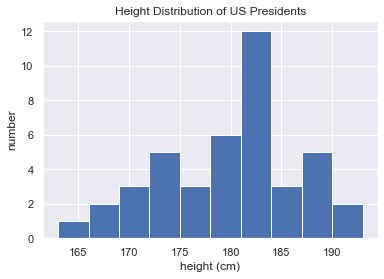

In [121]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

# Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [122]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [123]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [124]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [125]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [126]:
a = np.arange(4)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2 3]
[[0]
 [1]
 [2]]


In [127]:
a + b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the [appendix](06.00-Figure-Code.ipynb#Broadcasting), and is adapted from source published in the [astroML](http://astroml.org) documentation. Used by permission).

![Broadcasting Visual](figures/02.05-broadcasting.png)

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

In [128]:
np.array([1,2,3])+np.ones((3, 3))

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

In [129]:
np.array([1,2,3]).shape

(3,)

In [130]:
np.array([1,2,3]).reshape((1,3)).shape

(1, 3)